# Setup

## Colab setup

Run the following cells in order (by pressing `Shift-Enter` or clicking on the "play" button at the top-left of a cell when mousing over it). When a warning pops up, choose "Run anyway".

In [ ]:
!rm -r sample_data
!git clone https://github.com/SimoneBarbaro/data_science_lab_project.git

In [ ]:
import os
os.chdir("./data_science_lab_project/data")
!wget -O TWOSIDES_medDRA.csv.gz https://polybox.ethz.ch/index.php/s/Uemf21AIiZ7ooNi/download
os.chdir("..")

While waiting for the download above to complete, open the file browser on the left by clicking on the folder icon.

**Upload the results archive `results_2020_11_27.zip` ([Polybox link](https://polybox.ethz.ch/index.php/f/2160436597)) to the `data_science_lab_project` folder** by hovering over the folder and choosing "Upload" from the three-dots menu that appears on the right. `results_2020_11_27.zip` should then be within the `data_science_lab_project` folder next to the `src` and `data` folders, which you can check by expanding the folder contents by clicking on the triangle on the left of the folder name.

Additionally, **upload the paired SPiDER data `matrix_spider_full.pkl.gz` ([Polybox link](https://polybox.ethz.ch/index.php/f/2160073828)) and `matrix_spider_names_full.pkl.gz` ([Polybox link](https://polybox.ethz.ch/index.php/f/2160073720)) into the `data` folder** (within `data_science_lab_project`) using the three-dots menu of the `data` folder. Expand the `data` folder and check that `matrix_spider_full.pkl.gz` and `matrix_spider_names_full.pkl.gz` as well as `TWOSIDES_medDRA.csv.gz` downloaded automatically above are present in it.

In [ ]:
!unzip results_*.zip

In [ ]:
!pip install -r src/requirements.txt
os.chdir("src")

Running the following cell should now list the runs that can be analyzed: each is a clustering method followed by the number of clusters and other relevant parameters.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
cwd = os.getcwd()
results_directory = "../results"
results_directory = os.path.join(cwd, results_directory)
for f in sorted(os.listdir(results_directory)):
    path = os.path.join(results_directory, f)
    if os.path.isdir(path):
        print(f)

aggl10
aggl10ave
aggl15
aggl20
aggl30
aggl5ave
dpgmm
dpgmm10
dpgmm20
dpgmm30
gmm
gmm10
gmm15
gmm20
gmm20_tsne
gmm30
kmeans
kmeans10
kmeans16
kmeans18
kmeans20
kmeans25norm
kmeans30
test


## Choose one of the clustering metod from above here

In [2]:
name_analysis = 'aggl15'

In [3]:
# The following sets up filepath variables for use later in the notebook
result_path = os.path.join(results_directory, name_analysis)
analysis_path = os.path.join(result_path, "analysis")

# Clusters

Show the beginning of the clustering results file to check it was read correctly:

In [4]:
pth = os.path.join(result_path, 'results.csv')
clustering_results = pd.read_csv(pth)
display(clustering_results.head())
print("Number of drug pairs: {}\nNumber of clusters: {} (from {} to {})".format(clustering_results.shape[0], clustering_results["cluster"].drop_duplicates().count(), clustering_results["cluster"].min(), clustering_results["cluster"].max()))

,name1,name2,cluster
0,imipramine,bupropion,8
1,imipramine,hyoscyamine,2
2,imipramine,sulpiride,5
3,imipramine,clindamycin,7
4,imipramine,triamterene,1


Number of drug pairs: 60240
Number of clusters: 15 (from 0 to 14)


Query for a specific drug pair provide names of both drugs in cell below:

In [5]:
name1 = 'tamoxifen'
name2 = 'bupropion'
clustering_results[(clustering_results['name1'] == name1) & (clustering_results['name2'] == name2)]

,name1,name2,cluster


# Side effects analysis

## Choose a level of side effects

There are five levels to the MedDRA hierarchy, of which four are available here. `System Organ Classes (SOC)` are the highest level terms based on location, etiology, or purpose. `High Level Group Terms (hlgt)` which are the next highest level terms are groups of `High Level Terms (hlt)` grouped together by anatomy, pathology, physiology, etiology and function. Likewise, `High Level Terms (hlt)`s themselves are groups of `Preferred Terms (pt)`, the most specific terms, grouped together by the same criteria.

In the cell below, choose the analysis level of Meddra terms to look at for the analysis.

In [6]:
analysis_level = 'soc'

In [7]:
pth = os.path.join(analysis_path, 'scores_' + analysis_level + '_term.csv')
sideeffect_results = pd.read_csv(pth)
sideeffect_results

,cluster,soc_term,value,tfidf_score
0,0,Nervous system disorders,0.098596,0.410299
1,0,Gastrointestinal disorders,0.075691,0.314982
2,0,General disorders and administration site cond...,0.074494,0.310002
3,0,Vascular disorders,0.071909,0.299243
4,0,"Respiratory, thoracic and mediastinal disorders",0.063633,0.264804
...,...,...,...,...
385,14,Surgical and medical procedures,0.011106,0.046320
386,14,Social circumstances,0.006034,0.025167
387,14,Ear and labyrinth disorders,0.005730,0.023898
388,14,"Pregnancy, puerperium and perinatal conditions",0.002134,0.008901


Show the top `N` side effects per group:

In [8]:
N = 4

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sideeffect_results.groupby("cluster").head(N).set_index(["cluster", "{}_term".format(analysis_level)]))

value  \
cluster soc_term                                                       
0       Nervous system disorders                            0.098596   
        Gastrointestinal disorders                          0.075691   
        General disorders and administration site condi...  0.074494   
        Vascular disorders                                  0.071909   
1       Nervous system disorders                            0.097837   
        Gastrointestinal disorders                          0.075734   
        General disorders and administration site condi...  0.073551   
        Vascular disorders                                  0.070675   
2       Nervous system disorders                            0.101549   
        General disorders and administration site condi...  0.076842   
        Gastrointestinal disorders                          0.075310   
        Vascular disorders                                  0.072407   
3       Nervous system disorders                            0.098860   
        Gastrointestinal disorders                          0.075623   
        General disorders and administration site condi...  0.074725   
        Vascular disorders                                  0.071622   
4       Nervous system disorders                            0.099645   
        Gastrointestinal disorders                          0.076722   
        General disorders and administration site condi...  0.074486   
        Vascular disorders                                  0.070740   
5       Nervous system disorders                            0.097868   
        General disorders and administration site condi...  0.076622   
        Gastrointestinal disorders                          0.076136   
        Vascular disorders                                  0.071843   
6       Nervous system disorders                            0.099405   
        General disorders and administration site condi...  0.076483   
        Gastrointestinal disorders                          0.075592   
        Vascular disorders                                  0.071051   
7       Nervous system disorders                            0.097159   
        Gastrointestinal disorders                          0.076441   
        General disorders and administration site condi...  0.073507   
        Vascular disorders                                  0.072729   
8       Nervous system disorders                            0.097784   
        Gastrointestinal disorders                          0.075372   
        General disorders and administration site condi...  0.073882   
        Vascular disorders                                  0.072846   
9       Nervous system disorders                            0.097878   
        Gastrointestinal disorders                          0.076224   
        General disorders and administration site condi...  0.073193   
        Vascular disorders                                  0.072359   
10      Nervous system disorders                            0.100441   
        General disorders and administration site condi...  0.077437   
        Gastrointestinal disorders                          0.074893   
        Vascular disorders                                  0.071569   
11      Nervous system disorders                            0.095387   
        Gastrointestinal disorders                          0.075744   
        Vascular disorders                                  0.074005   
        General disorders and administration site condi...  0.073973   
12      Nervous system disorders                            0.098230   
        Gastrointestinal disorders                          0.076724   
        General disorders and administration site condi...  0.075500   
        Vascular disorders                                  0.071118   
13      Nervous system disorders                            0.096430   
        Gastrointestinal disorders                          0.076375   
        General disorders and a

## Clusters numbers

Show cluster labels and count them:

In [9]:
sideeffect_results["cluster"].drop_duplicates().values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [10]:
num_clusters = sideeffect_results["cluster"].drop_duplicates().count()
num_clusters

15

## Choose a specific cluster to inspect

Below, one can choose which specific cluster to look at and analyze the significant side effects by changing the `cluster_no` variable.

In [11]:
cluster_no = 0

In [12]:
sideeffect_results[sideeffect_results['cluster'] == cluster_no]

,cluster,soc_term,value,tfidf_score
0,0,Nervous system disorders,0.098596,0.410299
1,0,Gastrointestinal disorders,0.075691,0.314982
2,0,General disorders and administration site cond...,0.074494,0.310002
3,0,Vascular disorders,0.071909,0.299243
4,0,"Respiratory, thoracic and mediastinal disorders",0.063633,0.264804
5,0,Psychiatric disorders,0.063461,0.264088
6,0,Investigations,0.062459,0.259917
7,0,Musculoskeletal and connective tissue disorders,0.060582,0.252106
8,0,"Injury, poisoning and procedural complications",0.057723,0.240212
9,0,Cardiac disorders,0.054769,0.227916


# Significance Analysis

The significance analysis shows which side effects are shown to be significant in each cluster using the [Grubbs test](https://en.wikipedia.org/wiki/Grubbs%27s_test#One-sided_case) at a significance level of 0.005. Below, choose a level of MedDRA hierarchy to observe the significant side effects predicted in each cluster. <!-- The `alpha` value determines the statistical significance level for which effects are significant. Currently only results for `alpha = 0.005` are computed. // alpha = 0.005  # Currently only 0.005 is available, do not change -->

## Choose a level of side effects

In [13]:
analysis_level = 'soc'

In [16]:
pth = os.path.join(analysis_path, 'significant_' + analysis_level + '_ranks_' + str(0.005) + '.csv')
statistical_results = pd.read_csv(pth)
statistical_results

,cluster,soc_term,value,tfidf_score,rank,grubbs
0,1,Vascular disorders,0.074063,0.309354,3.0,3.872983
1,10,Musculoskeletal and connective tissue disorders,0.064710,0.269116,5.0,3.063165
2,0,Musculoskeletal and connective tissue disorders,0.063239,0.263388,6.0,1.896245
3,1,Musculoskeletal and connective tissue disorders,0.059900,0.250195,7.0,0.729325


Look at the significant results summary. Each row shows a drug pair, its cluster and the top `soc`, top 3 `hlgt`, top 3 `hlt` and top 3 `pt` side effects for that cluster. `NaN` means the cluster did not have a significant side effect at a given level.

In [18]:
pth = os.path.join(analysis_path, 'significant_summary.csv')
summary_results = pd.read_csv(pth)
summary_results

,name1,name2,cluster,soc1,hlgt1,hlgt2,hlgt3,hlt1,hlt2,hlt3,pt1,pt2,pt3
0,imipramine,bupropion,14,NaN,Lower respiratory tract disorders (excl obstru...,Reproductive neoplasms male malignant and unsp...,NaN,Angioedemas,NaN,NaN,Bartter's syndrome,Congenital knee deformity,Incision site blister
1,cholecalciferol,nortriptyline,14,NaN,Lower respiratory tract disorders (excl obstru...,Reproductive neoplasms male malignant and unsp...,NaN,Angioedemas,NaN,NaN,Bartter's syndrome,Congenital knee deformity,Incision site blister
2,cholecalciferol,ceftriaxone,14,NaN,Lower respiratory tract disorders (excl obstru...,Reproductive neoplasms male malignant and unsp...,NaN,Angioedemas,NaN,NaN,Bartter's syndrome,Congenital knee deformity,Incision site blister
3,cholecalciferol,citalopram,14,NaN,Lower respiratory tract disorders (excl obstru...,Reproductive neoplasms male malignant and unsp...,NaN,Angioedemas,NaN,NaN,Bartter's syndrome,Congenital knee deformity,Incision site blister
4,cholecalciferol,perindopril,14,NaN,Lower respiratory tract disorders (excl obstru...,Reproductive neoplasms male malignant and unsp...,NaN,Angioedemas,NaN,NaN,Bartter's syndrome,Congenital knee deformity,Incision site blister
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60235,fenoterol,clarithromycin,11,NaN,NaN,NaN,NaN,Cardiac histopathology procedures,Fertility and fertilisation interventions female,NaN,Ocular pemphigoid,Sydenham's chorea,Congenital pulmonary valve disorder
60236,clonidine,digoxin,11,NaN,NaN,NaN,NaN,Cardiac histopathology procedures,Fertility and fertilisation interventions female,NaN,Ocular pemphigoid,Sydenham's chorea,Congenital pulmonary valve disorder
60237,vitamin b6,famotidine,11,NaN,NaN,NaN,NaN,Cardiac histopathology procedures,Fertility and fertilisation interventions female,NaN,Ocular pemphigoid,Sydenham's chorea,Congenital pulmonary valve disorder
60238,digoxin,famotidine,11,NaN,NaN,NaN,NaN,Cardiac histopathology procedures,Fertility and fertilisation interventions female,NaN,Ocular pemphigoid,Sydenham's chorea,Congenital pulmonary valve disorder


Query for specific drugs

In [19]:
name1 = 'tamoxifen'
name2 = 'bupropion'
summary_results[(summary_results['name1'] == name1) & (summary_results['name2'] == name2)]

,name1,name2,cluster,soc1,hlgt1,hlgt2,hlgt3,hlt1,hlt2,hlt3,pt1,pt2,pt3


# Target distribution for significant clusters

This block will run the Interactive Analysis for identifying the strongest targets in each cluster.

In [20]:
from experiment.interactive_analysis import InteractiveAnalyzer

This may take some time as it needs to load TWOSIDES for further analysis.

In [22]:
analyzer = InteractiveAnalyzer(result_path)

#### Choose the level, the number of clusters to consider and the number of targets per cluster to show

In [25]:
analysis_level = 'hlgt'
targets_per_cluster = 5
cluster_number = clustering_results["cluster"].drop_duplicates().count()

In [26]:
significant_clusters, important_targets = analyzer.get_important_data(analysis_level, cluster_number, targets_per_cluster)

In [27]:
significant_clusters

,cluster,soc_term,value,tfidf_score,rank,grubbs,counts
0,1,Vascular disorders,0.074063,0.309354,3.0,3.872983,2
1,10,Musculoskeletal and connective tissue disorders,0.064710,0.269116,5.0,3.063165,1
2,0,Musculoskeletal and connective tissue disorders,0.063239,0.263388,6.0,1.896245,1
3,1,Musculoskeletal and connective tissue disorders,0.059900,0.250195,7.0,0.729325,2


#### Choose a specific cluster to inspect from the ones in the column "cluster" of the table above

In [30]:
cluster_no = 12

Descriptive statistics of the distribution of SPiDER predictions for important target of the chosen cluster:

In [50]:
desc = important_targets[cluster_no].describe()
frac = (important_targets[cluster_no] > 0.5).sum()/(important_targets[cluster_no].count())
frac = frac.rename("Fraction above Threshold")
desc.append(frac)

,Potassium Channel,Serine Threonine Kinase,"Endopeptidase (Serine Endopeptidase, Serine Protease)",DNA Polymerase,Sodium Channel
count,542.000000,542.000000,542.000000,542.000000,542.000000
mean,1.080662,1.058308,0.990548,0.885332,0.856539
std,0.488559,0.437855,0.462215,0.437344,0.519362
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.779000,0.796250,0.620000,0.493000,0.475000
50%,1.006000,0.982000,0.952000,0.916500,0.934000
75%,1.425250,1.394000,1.369750,1.248500,1.265500
max,1.992000,1.985000,1.935000,1.918000,1.988000
Fraction above Threshold,0.811808,0.835793,0.797048,0.712177,0.636531


#### Choose a target to visualize from the columns above

In [32]:
target = 'Serine Threonine Kinase'
threshold = 0.5

Histogram:

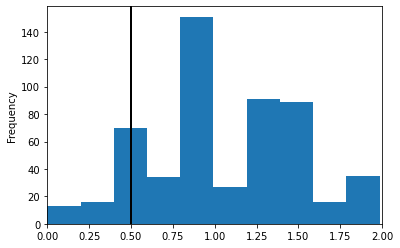

In [33]:
important_targets[cluster_no][target].plot.hist(xlim=[0,2])
plt.axvline(threshold, color='k', linewidth=2)